In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit import Parameter

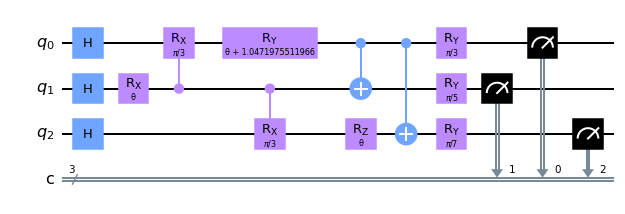

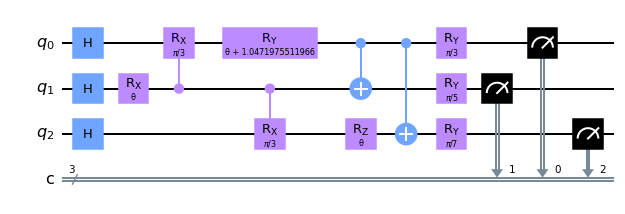

In [2]:
# create a quantum circuit with one parameter theta, which influsses 3 gates, and two additional circuits after parameter shifting
theta = Parameter('θ')
qc = QuantumCircuit(3, 3)
qc1 = QuantumCircuit(3, 3)
qc2 = QuantumCircuit(3, 3)
qcs = [qc,qc1,qc2]

for i in range(3):
    qcs[i].h(0)
    qcs[i].h(1)
    qcs[i].h(2)

qc.rx(theta,1)
qc1.rx(theta+pi/4,1)
qc2.rx(theta-pi/4,1)

for i in range(3):
    qcs[i].crx(pi/3,1,0)
    qcs[i].crx(pi/3,1,2)

qc.ry(theta+pi/3,0)
qc1.ry(theta+pi/4+pi/3,0)
qc2.ry(theta-pi/4+pi/3,0)
qc.rz(theta,2)
qc1.rz(theta+pi/4,2)
qc2.rz(theta-pi/4,2)

for i in range(3):
    qcs[i].cx(0,1)
    qcs[i].cx(0,2)
    qcs[i].ry(pi/3,0)
    qcs[i].ry(pi/5,1)
    qcs[i].ry(pi/7,2)
    qcs[i].measure(range(3), range(3))
    
qc.draw('mpl')

In [4]:
# assign 512 values to theta and do 4096 shots to each value, collect possibilities for measurement >

theta_range = np.linspace(0, 2 * np.pi, 512)
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range],shots = 4096)

job1 = execute(qc1,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range],shots = 4096)

job2 = execute(qc2,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range],shots = 4096)

counts = job.result().get_counts()
counts1 = job1.result().get_counts()
counts2 = job2.result().get_counts()


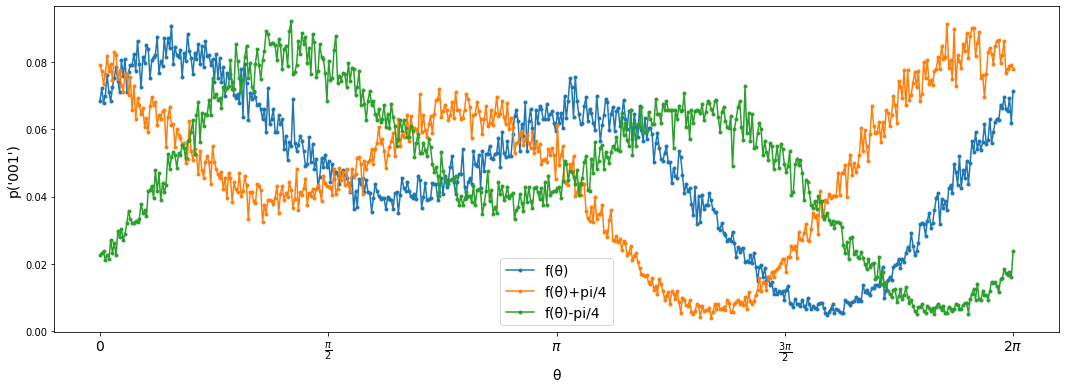

In [5]:
# generate figure

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('001', 0)/4096, counts)), '.-', label='f(θ)')
ax.plot(theta_range, list(map(lambda c: c.get('001', 0)/4096, counts1)), '.-', label='f(θ)+pi/4')
ax.plot(theta_range, list(map(lambda c: c.get('001', 0)/4096, counts2)), '.-', label='f(θ)-pi/4')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('p(\'001\')', fontsize=14)
ax.legend(fontsize=14)